# Task6: Predicting Real Estate House Prices

## This task is provided to test your understanding of building a Linear Regression model for a provided dataset

### Dataset: Real_estate.csv

### Import the necessary libraries
#### Hint: Also import seaborn

In [1]:
# Importing required libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import plotly.express as px
import plotly.io as pio
warnings.filterwarnings('ignore')

### Read the csv data into a pandas dataframe and display the first 5 samples

In [2]:
# Importing the data set:
ds = pd.read_csv('Real estate.csv')

print(ds)

      No  X1 transaction date  X2 house age  \
0      1             2012.917          32.0   
1      2             2012.917          19.5   
2      3             2013.583          13.3   
3      4             2013.500          13.3   
4      5             2012.833           5.0   
..   ...                  ...           ...   
409  410             2013.000          13.7   
410  411             2012.667           5.6   
411  412             2013.250          18.8   
412  413             2013.000           8.1   
413  414             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4                                 3

### Show more information about the dataset

In [3]:
ds.info

<bound method DataFrame.info of       No  X1 transaction date  X2 house age  \
0      1             2012.917          32.0   
1      2             2012.917          19.5   
2      3             2013.583          13.3   
3      4             2013.500          13.3   
4      5             2012.833           5.0   
..   ...                  ...           ...   
409  410             2013.000          13.7   
410  411             2012.667           5.6   
411  412             2013.250          18.8   
412  413             2013.000           8.1   
413  414             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4  

### Find how many samples are there and how many columns are there in the dataset

In [6]:
num_samples, num_columns = ds.shape

print("Number of samples:", num_samples)
print("Number of colums:", num_columns)

Number of samples: 414
Number of colums: 8


### What are the features available in the dataset?

In [7]:
print("Features in the dataset:")
print(ds.columns)

Features in the dataset:
Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')


In [8]:
features = ds.columns
print("Features in the dataset:")
for feature in features:
    print(feature)

Features in the dataset:
No
X1 transaction date
X2 house age
X3 distance to the nearest MRT station
X4 number of convenience stores
X5 latitude
X6 longitude
Y house price of unit area


### Check if any features have missing data

In [11]:
missing_data = ds.isna().sum()
missing_data

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [12]:
columns_with_missing_data = missing_data[missing_data > 0]
if not columns_with_missing_data.empty:
    print("Columns with missing data:")
    print(columns_with_missing_data)
else:
    print("No columns have missing data.")

No columns have missing data.


### Group all the features as dependent features in X

In [41]:
X = ds.groupby('No')['X1 transaction date','X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores', 'X5 latitude', 'X6 longitude'].sum().reset_index()
X = X.rename(columns={'X1 transaction date':'Transaction Date','X2 house age':'Age','X3 distance to the nearest MRT station':'Nearest MRT Station Distance','X4 number of convenience stores':'Number of convenience stores near', 'X5 latitude':'Latitude', 'X6 longitude':'Longitude'})
X

,No,Transaction Date,Age,Nearest MRT Station Distance,Number of convenience stores near,Latitude,Longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067


### Group feature(s) as independent features in y

In [48]:
Y = ds.groupby('No')['Y house price of unit area'].sum().reset_index()
Y 

,No,Y house price of unit area
0,1,37.9
1,2,42.2
2,3,47.3
3,4,54.8
4,5,43.1
...,...,...
409,410,15.4
410,411,50.0
411,412,40.6
412,413,52.5


In [50]:
y_data = ds['Y house price of unit area']
print(y_data)

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64


### Split the dataset into train and test data

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset
ds = pd.read_csv('Real estate.csv')

# Define your feature matrix X and target variable y
X = ds.drop(columns=['Y house price of unit area',])  # Features (all columns except the target variable)
y = ds['Y house price of unit area']  # Target variable

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the values of X_train, X_test, y_train, and y_test
print("X_train:")
print(X_train)
print("\nX_test:")
print(X_test)
print("\ny_train:")
print(y_train)
print("\ny_test:")
print(y_test)

X_train:
      No  X1 transaction date  X2 house age  \
192  193             2013.167          43.8   
234  235             2013.250           8.0   
5      6             2012.667           7.1   
45    46             2013.083          36.6   
245  246             2013.417           7.5   
..   ...                  ...           ...   
71    72             2013.083          35.5   
106  107             2013.083          17.2   
270  271             2013.333          10.8   
348  349             2012.833           4.6   
102  103             2013.083           1.1   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
192                                57.58945                                7   
234                              2216.61200                                4   
5                                2175.03000                                3   
45                                488.81930                                8   
245                       

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset
ds = pd.read_csv('Real estate.csv')

# Define your feature matrix X and target variable y
X = ds.drop(columns=['Y house price of unit area','X1 transaction date'])  # Features (all columns except the target variable)
y1 = ds['Y house price of unit area']  # Target variable

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)

# Print the values of X_train, X_test, y_train, and y_test
print("X_train:")
print(X_train)
print("\nX_test:")
print(X_test)
print("\ny_train:")
print(y_train)
print("\ny_test:")
print(y_test)

X_train:
      No  X2 house age  X3 distance to the nearest MRT station  \
192  193          43.8                                57.58945   
234  235           8.0                              2216.61200   
5      6           7.1                              2175.03000   
45    46          36.6                               488.81930   
245  246           7.5                               639.61980   
..   ...           ...                                     ...   
71    72          35.5                               640.73910   
106  107          17.2                               189.51810   
270  271          10.8                               252.58220   
348  349           4.6                               259.66070   
102  103           1.1                               193.58450   

     X4 number of convenience stores  X5 latitude  X6 longitude  
192                                7     24.96750     121.54069  
234                                4     24.96007     121.51361  


### Choose the model (Linear Regression)

In [17]:
from sklearn.linear_model import LinearRegression

### Create an Estimator object

In [28]:
model = LinearRegression()
model

LinearRegression()

In [30]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

### Train the model

In [31]:
model.fit(X_train, y_train)

LinearRegression()

### Apply the model

In [32]:
y_pred = model.predict(X_test)
print(y_pred)

[47.04645871 40.40783016 43.37463978 39.20600382 26.62817953 45.8923956
 44.33888897 46.74448468 24.43235155 55.06258487 34.60848974 36.92386329
 36.76420984 24.30494918 35.79519845 33.44810036 44.24993318 44.98654734
 29.18096544 44.80711275  1.15259949 36.10694406 47.26486776 45.90792727
 10.96198835 38.69069634 12.57701679 43.61237869 35.7142565  37.55475044
 14.14012034 40.46209983 35.90891223 28.5174525  47.38286733 30.9022379
 50.43545093 12.92669013 48.95222574 39.27068588 39.3872837  40.09381011
 48.20107097 37.08010208 39.54765933 47.348201   43.3815801  21.07747224
 47.05299802 44.57951775 48.24233055 48.12297596 41.42189435 42.25141469
 36.32214409 15.69024514 37.64733588 35.12221291 29.08561558 46.86297981
 32.07763941 33.25961566 15.22965501  9.01697131  9.37929873 33.78712833
 29.59931587 47.50139803 33.81312917 31.84174056 46.48732668 38.98112924
 46.72835605 45.6962431  35.99239567 38.58963559 38.0020306  36.55979271
 41.37412002 32.65154281 42.60853061 43.39877883 28.5

### Display the coefficients

In [33]:
# Access the coefficients
coefficients = model.coef_

# Display the coefficients
print("Coefficients:")
for feature, coef in zip(X_train.columns, coefficients):
    print(f"{feature}: {coef}")

Coefficients:
No: -0.005616952867451074
X1 transaction date: 5.40743501819726
X2 house age: -0.26782799856207207
X3 distance to the nearest MRT station: -0.004815433146887135
X4 number of convenience stores: 1.0811444458248962
X5 latitude: 226.04879884136403
X6 longitude: -30.125491420548872


In [34]:
# Access the coefficients
coefficients = model.coef_

# Displaying coeffients
print("Coefficients as an array:")
print(coefficients)

Coefficients as an array:
[-5.61695287e-03  5.40743502e+00 -2.67827999e-01 -4.81543315e-03
  1.08114445e+00  2.26048799e+02 -3.01254914e+01]


### Find how well the trained model did with testing data

In [35]:
from sklearn.metrics import r2_score
# Calculate R2 score
r2 = r2_score(y1_test, y_pred)

# Print the R2 score
print("R2 Score:", r2)

R2 Score: 0.6745228670350792


### Plot House Age Vs Price
#### Hint: Use regplot in sns

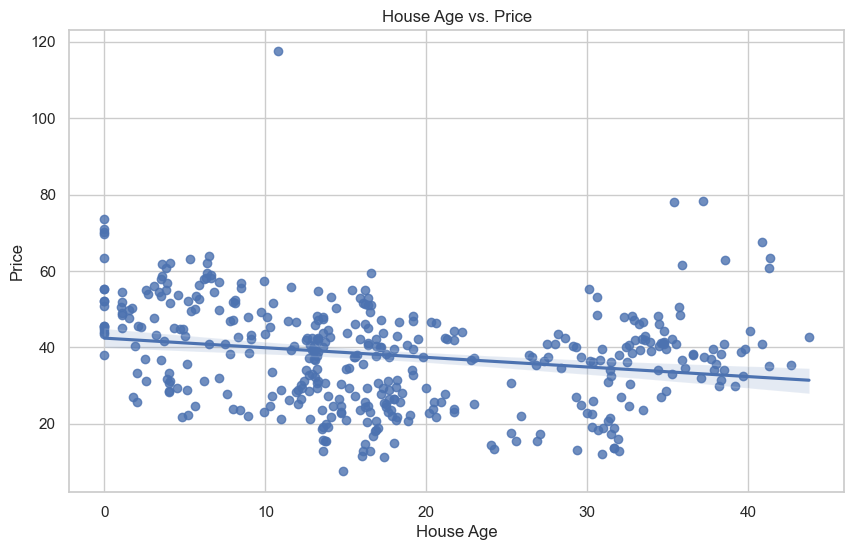

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot (optional)
sns.set(style="whitegrid")

# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))  # Set the size of the plot
sns.regplot(x='X2 house age', y='Y house price of unit area', data=ds)

# Add labels and title
plt.xlabel("House Age")
plt.ylabel("Price")
plt.title("House Age vs. Price")

# Show the plot
plt.show()

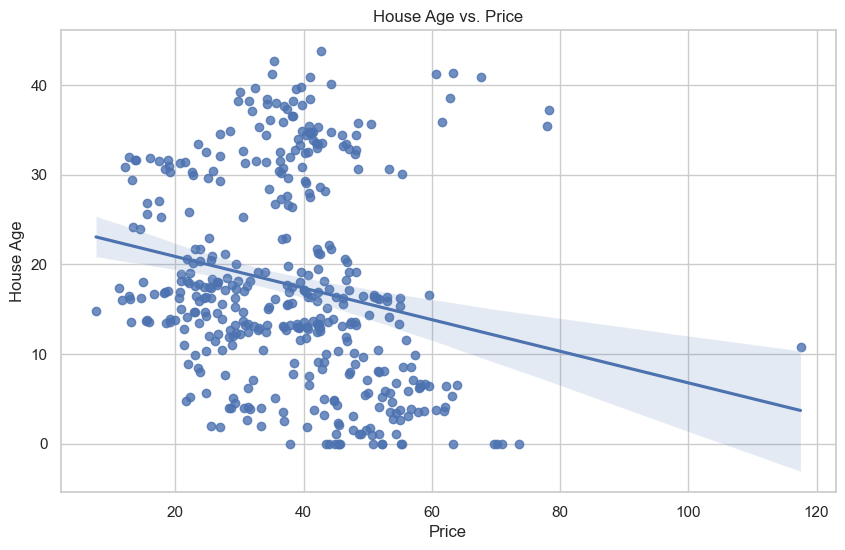

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot (optional)
sns.set(style="whitegrid")

# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))  # Set the size of the plot
sns.regplot(y='X2 house age', x='Y house price of unit area', data=ds)

# Add labels and title
plt.ylabel("House Age")
plt.xlabel("Price")
plt.title("House Age vs. Price")

# Show the plot
plt.show()

### Plot Distance to MRT station Vs Price

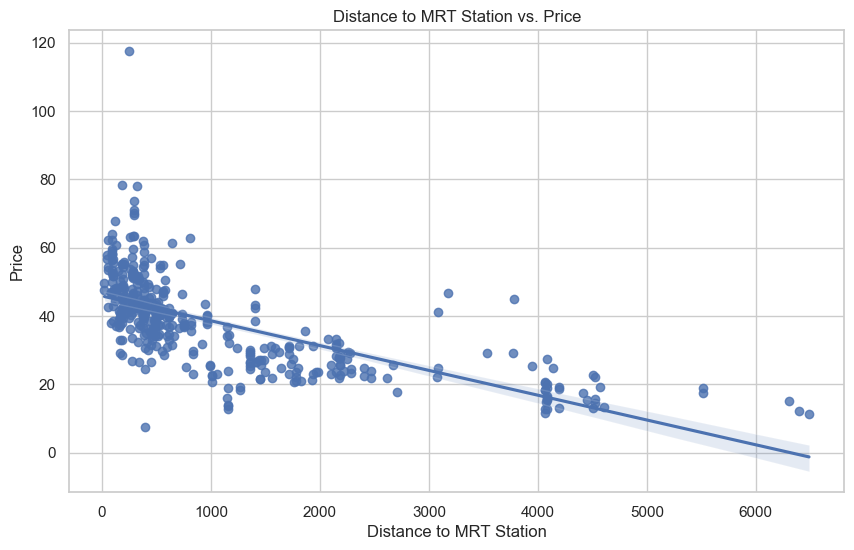

In [40]:
# Set the style of the plot (optional)
sns.set(style="whitegrid")

# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))  # Set the size of the plot
sns.regplot(x='X3 distance to the nearest MRT station', y='Y house price of unit area', data=ds)

# Add labels and title
plt.xlabel("Distance to MRT Station")
plt.ylabel("Price")
plt.title("Distance to MRT Station vs. Price")

# Show the plot
plt.show()


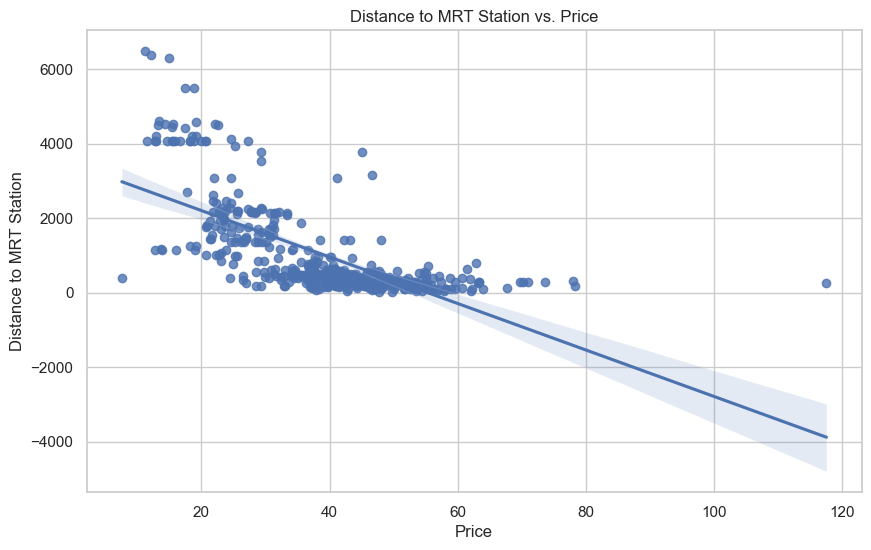

In [44]:
# Set the style of the plot (optional)
sns.set(style="whitegrid")

# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))  # Set the size of the plot
sns.regplot(y='X3 distance to the nearest MRT station', x='Y house price of unit area', data=ds)

# Add labels and title
plt.ylabel("Distance to MRT Station")
plt.xlabel("Price")
plt.title("Distance to MRT Station vs. Price")

# Show the plot
plt.show()


### Plot Number of Convienience Stores Vs Price

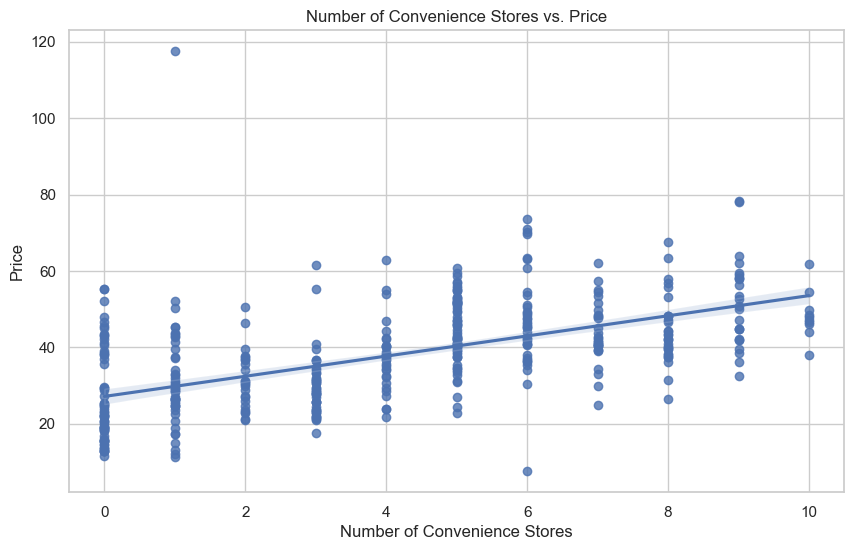

In [41]:
# Set the style of the plot (optional)
sns.set(style="whitegrid")

# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))  # Set the size of the plot
sns.regplot(x='X4 number of convenience stores', y='Y house price of unit area', data=ds)

# Add labels and title
plt.xlabel("Number of Convenience Stores")
plt.ylabel("Price")
plt.title("Number of Convenience Stores vs. Price")

# Show the plot
plt.show()

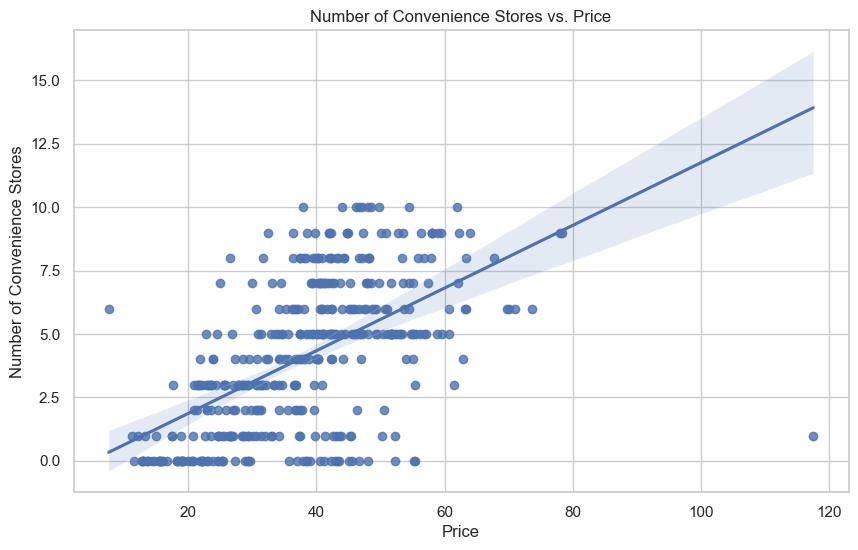

In [45]:
# Set the style of the plot (optional)
sns.set(style="whitegrid")

# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))  # Set the size of the plot
sns.regplot(y='X4 number of convenience stores', x='Y house price of unit area', data=ds)

# Add labels and title
plt.ylabel("Number of Convenience Stores")
plt.xlabel("Price")
plt.title("Number of Convenience Stores vs. Price")

# Show the plot
plt.show()